<a href="https://colab.research.google.com/github/RodrigoTito/Desistencia-de-Funcionario/blob/main/Data_Sprint_56_Desistencia_de_Funcionario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de machine learning

### Desafio proposto

O desgaste de funcionários é um desafio global para empresas de todos os tamanhos. Isso leva à interrupção operacional das organizações, acrescenta custos adicionais e a lista continua até que eles contratem o substituto certo e os treinem adequadamente. As empresas têm grande interesse em compreender as causas do desgaste de pessoal e em minimizá-lo.

Agora, a tarefa e  construir um modelo que preveja o desgaste de funcionários.

Para tanto, usaremos um conjunto de dados  disponível na comunidade [DPhi](https://dphi.tech/challenges/data-sprint-56-employee-attrition/177/overview/about).

Este conjunto de dados apresenta uma pesquisa com funcionários da IBM, indicando se há desgaste de funcionários ou não. O conjunto de dados contém aproximadamente ~ 1200 entradas. 


### Descrição de dados

Column name   | Descrição 
--------- | ------------
Id |  uma identificação anônima fornecida a um funcionário
Age | Idade de um funcionário
Attrition |  O funcionário saiu da empresa, 0-Não, 1-Sim
BusinessTravel |  Frequência de navegação de um funcionário
Department | Departamento de Trabalho
DistanceFromHome | Distância do escritório de casa
EducationField | Área da Educação
EmployeeNumber |  Número de funcionários na divisão de um determinado funcionário
EnvironmentSatisfaction | Satisfação com o ambiente de trabalho
Gender | Sexo do empregado
MartialStatus | Status marcial de um funcionário
MonthlyIncome | Renda mensal do empregado em dólares americanos
NumCompaniesWorked | Número de empresas nas quais o funcionário trabalhou antes de ingressar nesta empresa
OverTime | A pessoa trabalha horas extras
PercentSalaryHike | Aumento médio do salário anual em porcentagens
StockOptionLevel | Ações da empresa dadas a um funcionário
TotalWorkingYears | Experiência de trabalho total de um funcionário
TrainingTimesLastYear | Número de treinamentos pelos quais um funcionário passou no ano passado
YearsAtCompany | Número de anos trabalhados nesta empresa
YearsInCurrentRole | Número de anos na função atual
YearsSinceLastPromotion | Número de anos desde a última promoção
YearsWithCurrManager | Número de anos com o atual gerente
**Education** | **Educação** 
1 'Below College' | 1 'Abaixo da faculdade'
2 'College' | 2 'faculdade'
3 'Bachelor' | 3 'Bacharel'
4 'Master' | 4 'Mestre'
5 'Doctor' | 5 'Doutor' 
**EnvironmentSatisfaction**|  **Satisfação com o Meio Ambiente**
1 'Low' | 1 'baixo'
2 'Medium' | 2 'Médio'
3 'High'| 3 'alto'
4 'Very High' | 4 'Muito alto'
**JobInvolvement**|**Envolvimento no Trabalho**
1 'Low' | 1 'baixo'
2 'Medium' | 2 'Médio'
3 'High' | 3 'alto'
4 'Very High'  | 4 'Muito alto'
**JobSatisfaction**| **Satisfação no Trabalho**
1 'Low' | 1 'baixo'
2 'Medium' | 2 'Médio'
3 'High' | 3 'alto'
4 'Very High'  | 4 'Muito alto'
**PerformanceRating** | **Avaliação de Desempenho**
1 'Low' | 1 'baixo'
2 'Good' | 'Bom'
3 'Excellent' | 'Excelente'
4 'Outstanding' | 'Excepcional'
**Behaviour** | **Comportamento**
1 'Good' | 'Bom'
2 'Bad'  | 'Mau'
3 'Not Rated' | 'Não avaliado'
**CommunicationSkill** | **Habilidade em comunicação**
1 'Bad' | 'Mau' 
2 'Average' | 'Média'
3 'Good' | 'Bom'
4 'Better' | 'Melhor'
5 'Best'| 'Super'
**StockOptionLevel** | **Nível de opção de ações**
0 'No stocks' | 'Sem ações'
1 'Less Stocks' | 'Menos ações'
2 'Moderate Stocks' | 'Ações moderadas'
3 'A lot of Stocks' |  'Muitas ações'


### Resumo do projeto

* Bibliotecas necessárias
* Carregar dados 
* EDA - Análise Exploratória de Dados
* Pré-processamento e modelagem dos dados 
* Previsão da variável destino usando regressão logística 
* Métrica de avaliação com base no problema 
* Previsão e apresentação

### Bibliotecas

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Carregar Dados

In [2]:
print(sorted(os.listdir("/content")))

['.config', 'sample_data', 'testing_data.csv', 'training_data.csv']


In [162]:
train = pd.read_csv(sorted(os.listdir("../content"))[-1], sep = ';')
test = pd.read_csv(sorted(os.listdir("../content"))[-2])

### EDA - Análise Exploratória de Dados

* Os tamanhos dos datasets

In [33]:
[x.shape for x in [test, train]]

[(294, 34), (1176, 35)]

* Variáveis do dataset train

In [37]:
pd.DataFrame({'Cols_Train':train.columns}).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
Cols_Train,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition


* Colunas diferentes dos datasets train e test

In [34]:
train.columns.difference(test.columns)

Index(['Attrition'], dtype='object')

* Tipo das variáveis

In [15]:
train.dtypes.value_counts()  

int64     27
object     8
dtype: int64

* Visualizando o dataset train

In [36]:
train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,25,Travel_Rarely,685,Research & Development,1,3,Life Sciences,1,350,1,Female,62,3,2,Manufacturing Director,3,Married,4898,7505,0,Y,No,12,3,4,80,2,5,3,3,4,2,1,2,0
1,44,Travel_Rarely,1376,Human Resources,1,2,Medical,1,1098,2,Male,91,2,3,Human Resources,1,Married,10482,2326,9,Y,No,14,3,4,80,1,24,1,3,20,6,3,6,1
2,27,Travel_Rarely,135,Research & Development,17,4,Life Sciences,1,1405,4,Female,51,3,1,Research Scientist,3,Single,2394,25681,1,Y,Yes,13,3,4,80,0,8,2,3,8,2,7,7,1
3,40,Travel_Frequently,580,Sales,5,4,Life Sciences,1,729,4,Male,48,2,3,Sales Executive,1,Married,10475,23772,5,Y,Yes,21,4,3,80,1,20,2,3,18,13,1,12,0
4,24,Travel_Rarely,477,Research & Development,24,3,Medical,1,1173,4,Male,49,3,1,Laboratory Technician,2,Single,3597,6409,8,Y,No,22,4,4,80,0,6,2,3,4,3,1,2,0


* Resumo de cada variável do dataset train

In [38]:
df_aux = pd.DataFrame({'Type': train.dtypes,
                      'Missing': train.isna().sum(),
                      'Size': train.shape[0],
                       'Unique': train.nunique()
                     })
df_aux['Missing_%']= df_aux.Missing/df_aux.Size * 100
df_aux.sort_values(by='Missing_%', ascending=False)

,Type,Missing,Size,Unique,Missing_%
Age,int64,0,1176,43,0.0
StockOptionLevel,int64,0,1176,4,0.0
Over18,object,0,1176,1,0.0
OverTime,object,0,1176,2,0.0
PercentSalaryHike,int64,0,1176,15,0.0
PerformanceRating,int64,0,1176,2,0.0
RelationshipSatisfaction,int64,0,1176,4,0.0
StandardHours,int64,0,1176,1,0.0
TotalWorkingYears,int64,0,1176,39,0.0
MonthlyRate,int64,0,1176,1145,0.0


* Resumo de cada variável do dataset test

In [39]:
df_aux = pd.DataFrame({'Type': test.dtypes,
                      'Missing': test.isna().sum(),
                      'Size': test.shape[0],
                       'Unique': test.nunique()
                     })
df_aux['Missing_%']= df_aux.Missing/df_aux.Size * 100
df_aux.sort_values(by='Missing_%', ascending=False)

,Type,Missing,Size,Unique,Missing_%
Age,int64,0,294,43,0.0
StandardHours,int64,0,294,1,0.0
NumCompaniesWorked,int64,0,294,10,0.0
Over18,object,0,294,1,0.0
OverTime,object,0,294,2,0.0
PercentSalaryHike,int64,0,294,15,0.0
PerformanceRating,int64,0,294,2,0.0
RelationshipSatisfaction,int64,0,294,4,0.0
StockOptionLevel,int64,0,294,4,0.0
BusinessTravel,object,0,294,3,0.0


* Estatísticas descritivas

In [40]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1176.0,36.964286,9.148817,18.0,30.00,36.0,43.00,60.0
DailyRate,1176.0,801.496599,400.618020,102.0,468.25,801.5,1157.25,1499.0
DistanceFromHome,1176.0,9.097789,8.002540,1.0,2.00,7.0,14.00,29.0
Education,1176.0,2.917517,1.022720,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1176.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1176.0,1038.992347,599.144223,1.0,500.75,1040.5,1574.50,2065.0
EnvironmentSatisfaction,1176.0,2.728741,1.096404,1.0,2.00,3.0,4.00,4.0
HourlyRate,1176.0,65.398810,20.289856,30.0,48.00,65.0,83.00,100.0
JobInvolvement,1176.0,2.725340,0.708781,1.0,2.00,3.0,3.00,4.0
JobLevel,1176.0,2.071429,1.118510,1.0,1.00,2.0,3.00,5.0


* Visualização 

Gráficos de colunas

In [41]:
def grafico_com_porcentagem(df,feature,hue):
    total = len(df)
    ax =  sns.countplot(x=feature,hue=hue, data=df,color = "#2b8cbe")
    ax.set_ylim(0,total*1.1) # Ajusta altura do frame
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (x, y+10), ha='center')
    return ax
def grafico_com_porcentagem_1(g):
    g.ax.set_ylim(0,100)
    for p in g.ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        g.ax.annotate('{:.2f}%'.format(p.get_height()), (x, y+2), ha='center')
    return g

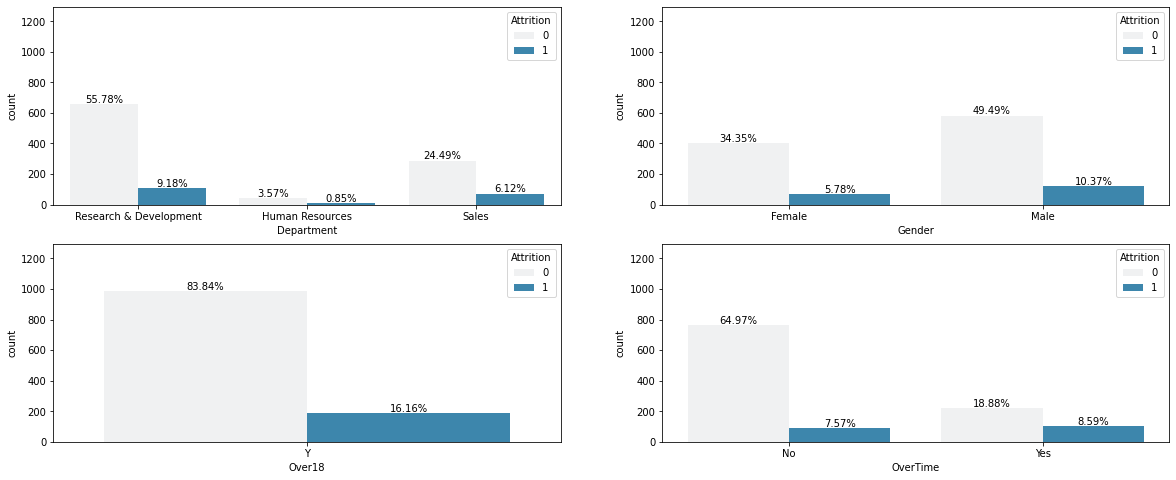

In [42]:
plt.figure(figsize=(20,8))
plt.subplot(221),grafico_com_porcentagem(train,'Department','Attrition')
plt.subplot(222),grafico_com_porcentagem(train,'Gender','Attrition')
plt.subplot(223),grafico_com_porcentagem(train,'Over18','Attrition')
plt.subplot(224),grafico_com_porcentagem(train,'OverTime','Attrition')
plt.show()

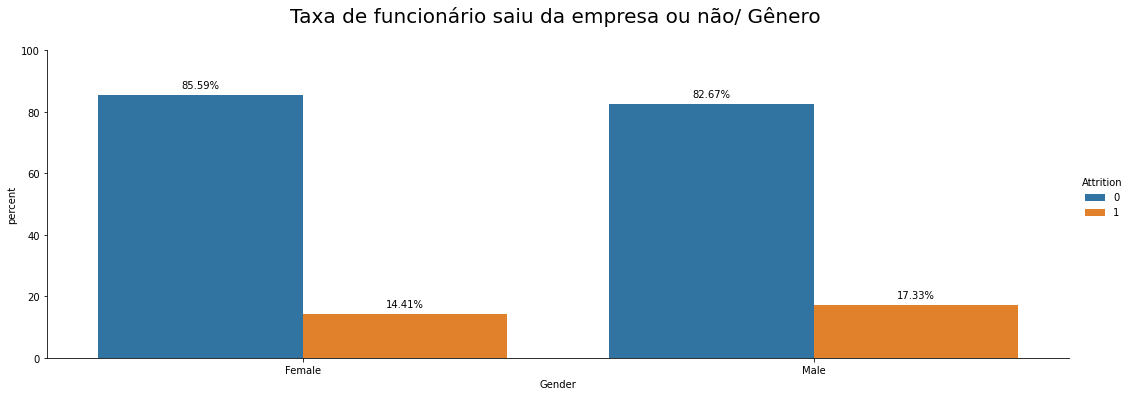

In [43]:
df1 = train.groupby('Gender')['Attrition'].value_counts(normalize=True)*100
df1 = df1.rename('percent').reset_index().sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='Gender',y='percent',hue='Attrition',kind='bar',data=df1, height=5,aspect = 3,palette="tab10")
grafico_com_porcentagem_1(g)
plt.title('Taxa de funcionário saiu da empresa ou não/ Gênero \n', fontsize=20)
plt.show()

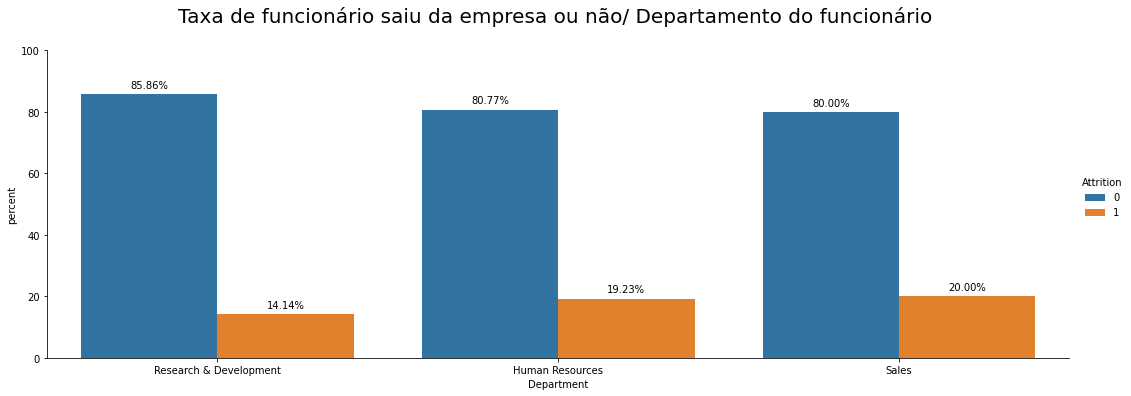

In [44]:
df1 = train.groupby('Department')['Attrition'].value_counts(normalize=True)*100
df1 = df1.rename('percent').reset_index().sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='Department',y='percent',hue='Attrition',kind='bar',data=df1, height=5,aspect = 3,palette="tab10")
grafico_com_porcentagem_1(g)
plt.title('Taxa de funcionário saiu da empresa ou não/ Departamento do funcionário \n', fontsize=20)
plt.show()

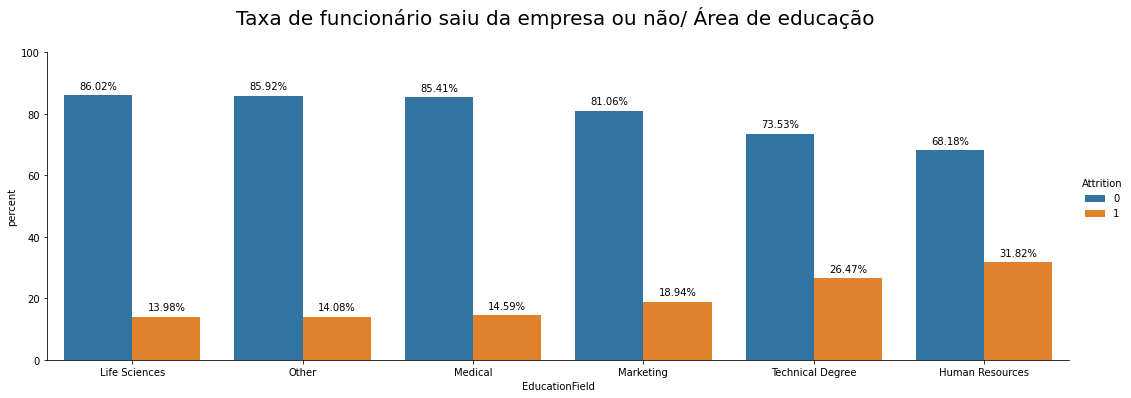

In [186]:
df1 = train.groupby('EducationField')['Attrition'].value_counts(normalize=True)*100
df1 = df1.rename('percent').reset_index().sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='EducationField',y='percent',hue='Attrition',kind='bar',data=df1, height=5,aspect = 3,palette="tab10")
grafico_com_porcentagem_1(g)
plt.title('Taxa de funcionário saiu da empresa ou não/ Área de educação \n', fontsize=20)
plt.show()

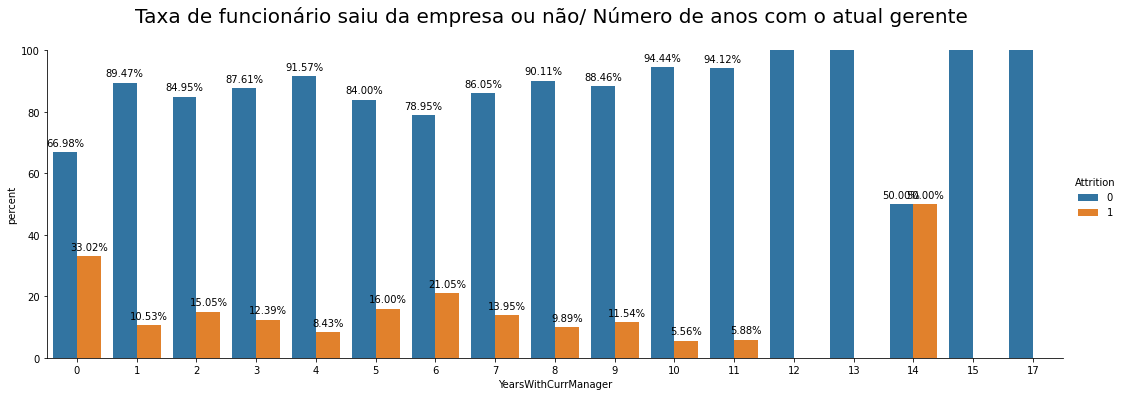

In [190]:
df1 = train.groupby('YearsWithCurrManager')['Attrition'].value_counts(normalize=True)*100
df1 = df1.rename('percent').reset_index().sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='YearsWithCurrManager',y='percent',hue='Attrition',kind='bar',data=df1, height=5,aspect = 3,palette="tab10")
grafico_com_porcentagem_1(g)
plt.title('Taxa de funcionário saiu da empresa ou não/ Número de anos com o atual gerente \n', fontsize=20)
plt.show()

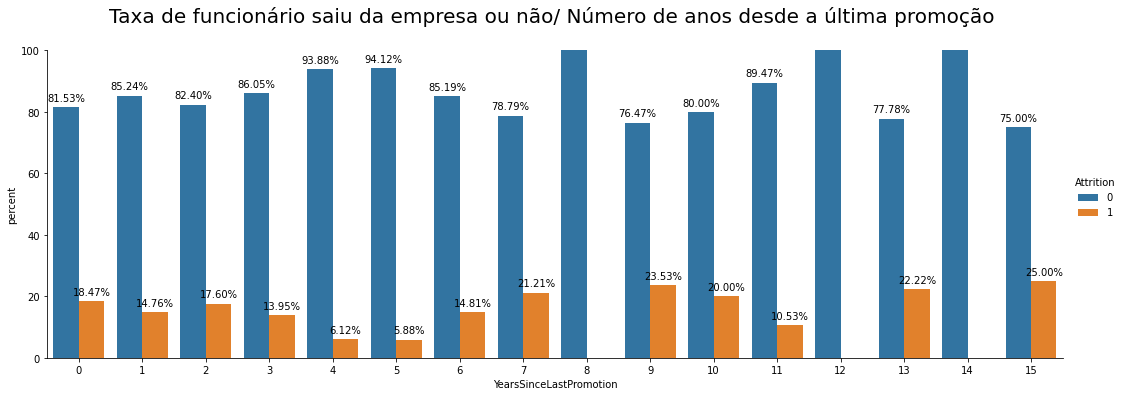

In [191]:
df1 = train.groupby('YearsSinceLastPromotion')['Attrition'].value_counts(normalize=True)*100
df1 = df1.rename('percent').reset_index().sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='YearsSinceLastPromotion',y='percent',hue='Attrition',kind='bar',data=df1, height=5,aspect = 3,palette="tab10")
grafico_com_porcentagem_1(g)
plt.title('Taxa de funcionário saiu da empresa ou não/ Número de anos desde a última promoção \n', fontsize=20)
plt.show()

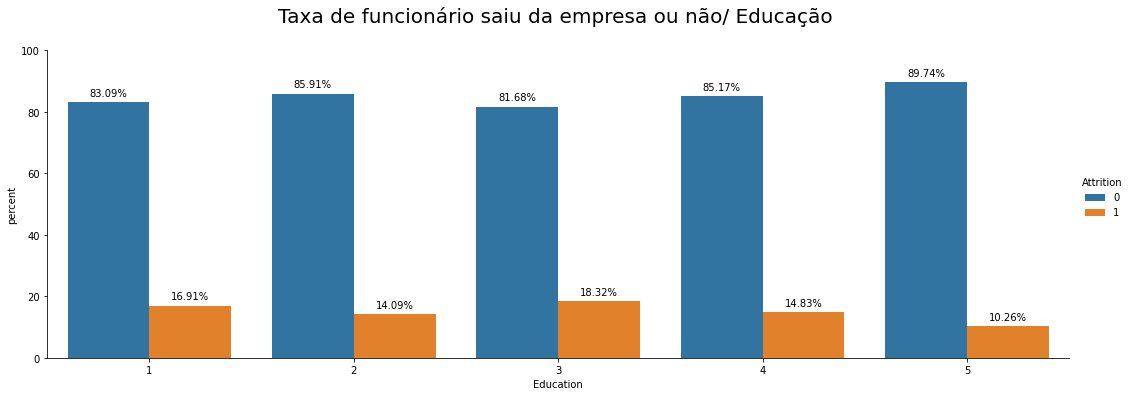

In [195]:
df1 = train.groupby('Education')['Attrition'].value_counts(normalize=True)*100
df1 = df1.rename('percent').reset_index().sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='Education',y='percent',hue='Attrition',kind='bar',data=df1, height=5,aspect = 3,palette="tab10")
grafico_com_porcentagem_1(g)
plt.title('Taxa de funcionário saiu da empresa ou não/ Educação \n', fontsize=20)
plt.show()

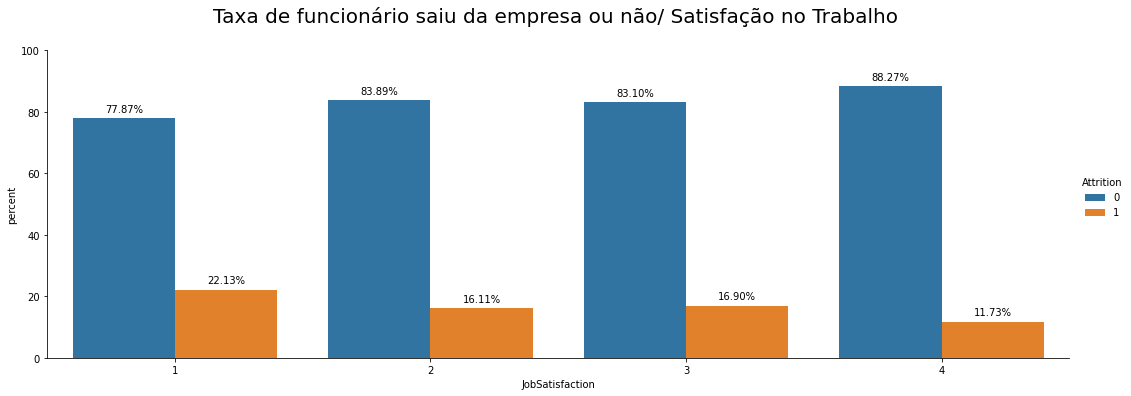

In [199]:
df1 = train.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True)*100
df1 = df1.rename('percent').reset_index().sort_values(by=['percent'], ascending = True)

g = sns.catplot(x='JobSatisfaction',y='percent',hue='Attrition',kind='bar',data=df1, height=5,aspect = 3,palette="tab10")
grafico_com_porcentagem_1(g)
plt.title('Taxa de funcionário saiu da empresa ou não/ Satisfação no Trabalho \n', fontsize=20)
plt.show()

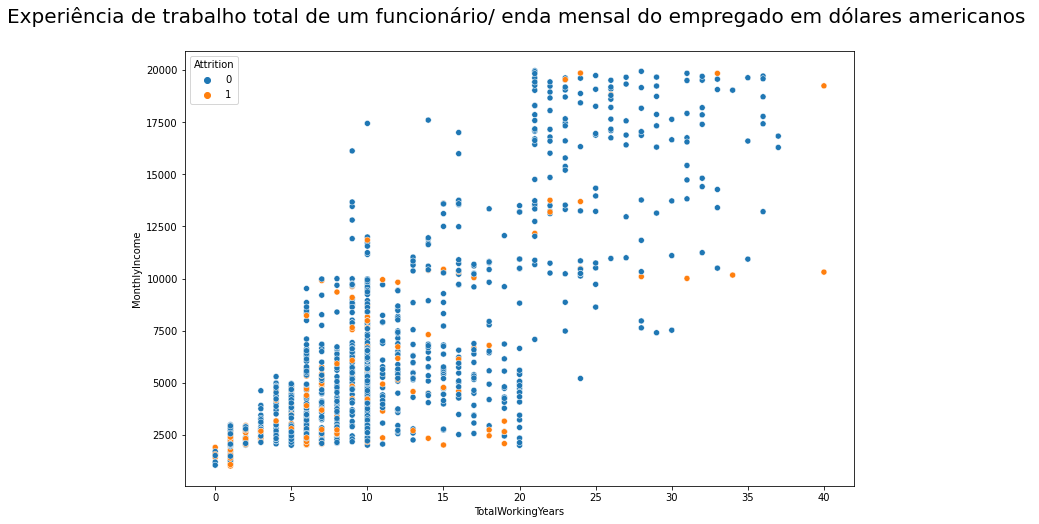

In [225]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train, x= 'TotalWorkingYears', y="MonthlyIncome", hue="Attrition")
plt.title('Experiência de trabalho total de um funcionário/ enda mensal do empregado em dólares americanos \n', fontsize=20)
plt.show()

### Pré-processamento e modelagem dos dados

* Fazendo uma cópia do dataset train

In [163]:
X = train.copy()

**Dividir dados**

* Separando a variável resposta das variáveis preditoras

In [164]:
y= X[["Attrition"]]
X = X.drop(['Attrition'],axis=1)

* Concatenando o dataset X com o dataset test

In [165]:
All_data = pd.concat([X, test], axis=0)

* Listando os índices das variáveis categóricas

In [166]:
cat_cols=All_data.select_dtypes("object").columns.tolist()
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

* Criando variáveis fictícias para as variáveis categóricas

In [167]:
all_data = pd.get_dummies(All_data, columns=cat_cols)

* Uma visão geral das estatísticas:

In [168]:
df_stats = all_data.describe().transpose()
df_stats.head(5)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


* Normalizando os dados

In [170]:
def norm(x,mean,std):
  if std==0:
    return x
  else:
    return (x - mean) / std
for i in range(0,len(all_data.columns)):
  all_data.iloc[:,i] = norm(all_data.iloc[:,i],df_stats['mean'][i],df_stats['std'][i])

* Separando os datasets  

In [173]:
X = all_data[:len(X)]
test = all_data[len(X):]

In [174]:
X.shape, test.shape

((1176, 55), (294, 55))

* Dividindo o dataset de treinamento e validação

In [101]:
from sklearn.model_selection import train_test_split

In [175]:
def train_test_split_yi(X,y):
  Xtrain, Xval, ytrain, yval = train_test_split(X, y, random_state=0, train_size=0.75, stratify=y)
  return Xtrain, Xval, ytrain, yval

### Modelo  de classificação -  Regressão Logística 

**Usaremos as seguintes métricas de avaliação:**

1. Recall
2. Precision 
3. F1_score
3. ROC - AUC : Área sob a curva característica de operação do receptor. Ou seja,  é a área sob a curva ao traçar a taxa de verdadeiro positivo (normalizada) (eixo x) e a taxa de falso positivo (eixo y).

*Nossa métrica principal aqui será os valores de F1_score, enquanto o AUC ROC Score cuidará de quão bem as probabilidades previstas são capazes de diferenciar entre as 2 classes.*

* Importando os pacotes do modelo e das métricas que serão utilizadas 


In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, recall_score,precision_score

* Treinando o medelo de regressão logística para cada produto 

In [ ]:
Xtrain, Xval, ytrain, yval = train_test_split_yi(X,y)
reg_log  = LogisticRegression().fit(Xtrain, ytrain)

In [177]:
regressao_logistica = []
score = []
recall_list = []
precision_list = []
roc_auc_score_list = []
f1_score_list = [] 
fpr_list = []
tpr_list = []
regressao_logistica.append(reg_log)
score.append(reg_log.score(Xval,yval))
pred_val = reg_log.predict(Xval)
f1_score_list.append(f1_score(yval, pred_val, average=None))
recall_list.append(recall_score(yval,pred_val)) 
precision_list.append(precision_score(yval,pred_val))
roc_auc_score_list.append(roc_auc_score(yval,reg_log.predict_proba(Xval)[:,1]))
fpr, tpr, _ = roc_curve(yval,reg_log.predict_proba(Xval)[:,1])
fpr_list.append(fpr)
tpr_list.append(tpr)

In [178]:
df_metrics = pd.DataFrame({'score': score, 
                           'recall_score': recall_list,
                           'precision_score':precision_list,
                           'f1_score':f1_score_list,
                           'roc_auc_score':roc_auc_score_list}).transpose()
df_metrics

,0
score,0.877551
recall_score,0.446809
precision_score,0.677419
f1_score,"[0.9294117647058823, 0.5384615384615384]"
roc_auc_score,0.839521


#### Curva AUC ROC 
Agora, vamos visualizar a curva AUC-ROC para o modelo 

In [179]:
def plot_roc_auc(fpr,tpr,auc,prod): 
  ax = plt.plot(fpr,tpr,label=prod + ": Validação AUC-ROC="+str(round(auc,2))) 
  x = np.linspace(0, 1, 1000)
  plt.plot(x, x, linestyle='-')
  plt.xlabel('Taxa de falso positivo') 
  plt.ylabel('Taxa de verdadeiro positivo') 
  plt.legend(loc=4) 
  return ax

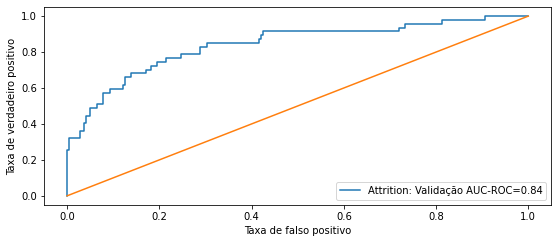

In [180]:
plt.figure(figsize=(20,8))
plt.subplot(221),plot_roc_auc(fpr_list[0],tpr_list[0],roc_auc_score_list[0],y.columns[0])
plt.show()

### Previsão e apresentação

* Prevendo quais funcionários do conjunto de dados test (conjunto de dados sem rótulo, ou seja, sem a variável resposta) estão mais propensos a sairem ou não da empresa 

In [182]:
y_pred_test = pd.DataFrame(regressao_logistica[0].predict(test),columns=['Attrition'])
y_pred_test.head()

,Attrition
0,0
1,0
2,0
3,0
4,1


* Resultado entregável 

In [183]:
test = pd.read_csv(sorted(os.listdir("../content"))[-2])
test['Attrition'] = y_pred_test
result_final = test
result_final.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,52,Travel_Rarely,699,Research & Development,1,4,Life Sciences,1,259,3,Male,65,2,5,Manager,3,Married,19999,5678,0,Y,No,14,3,1,80,1,34,5,3,33,18,11,9,0
1,43,Travel_Rarely,574,Research & Development,11,3,Life Sciences,1,1971,1,Male,30,3,3,Healthcare Representative,3,Married,7510,16873,1,Y,No,17,3,2,80,1,10,1,3,10,9,0,9,0
2,34,Travel_Rarely,1320,Research & Development,20,3,Technical Degree,1,1265,3,Female,89,4,1,Research Scientist,3,Married,2585,21643,0,Y,No,17,3,4,80,0,2,5,2,1,0,0,0,0
3,28,Travel_Rarely,1475,Sales,13,2,Marketing,1,1933,4,Female,84,3,2,Sales Executive,3,Single,9854,23352,3,Y,Yes,11,3,4,80,0,6,0,3,2,0,2,2,0
4,47,Travel_Frequently,1093,Sales,9,3,Life Sciences,1,1716,3,Male,82,1,4,Sales Executive,3,Married,12936,24164,7,Y,No,11,3,3,80,0,25,3,1,23,5,14,10,1


* Salvando no formato .csv para envio

In [184]:
result_final.to_csv("resultado_final.csv", index = False)